In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv")



In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop(["PassengerId","Ticket","Name","Fare","Cabin"] ,axis=1,inplace=True)

In [9]:
df["Age"]=df["Age"].replace(to_replace="0",value=np.nan)
df["Age"]=df["Age"].astype(float)

In [10]:
mean=df["Age"].mean()
mean

29.69911764705882

In [11]:
df["Age"].replace(np.nan,mean,inplace=True)

In [12]:
dummies=pd.get_dummies(df[["Pclass","Sex","Embarked"]],
                      columns=["Pclass","Sex","Embarked"],drop_first=True)



In [13]:
columns=["Pclass","Sex","Embarked"]
df=pd.concat([df,dummies],axis=1)
df.drop(columns,axis=1,inplace=True)



In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [15]:


lowage,uppage=remove_outlier(df['Age'])
df["Age"]=np.where(df['Age']>uppage,uppage,df['Age'])
df["Age"]=np.where(df['Age']<lowage,lowage,df['Age'])



In [18]:


from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
std_scale



StandardScaler()

In [21]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale= MinMaxScaler()
minmax_scale

MinMaxScaler()

In [22]:
df["Age"]=minmax_scale.fit_transform(df[["Age"]])
df["Age"].head()

0    0.375000
1    0.682692
2    0.451923
3    0.625000
4    0.625000
Name: Age, dtype: float64

In [47]:
x=df.drop(['Survived'],axis=1)
y=df[['Survived']]

In [48]:
from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split

In [49]:
#generate two class dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=127)


In [50]:
#train the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [51]:
#LogisticRegression
model1=LogisticRegression()
#knn
model2=KNeighborsClassifier(n_neighbors=4)

In [69]:
#fit the model

model2.fit(x_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [70]:
model1.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [71]:

#predict the probabilities
pred_prob1=model1.predict_proba(x_test)
pred_prob2=model2.predict_proba(x_test)

In [72]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

In [73]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [74]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

In [75]:
print(auc_score1, auc_score2)

0.8479287790697675 0.8514110949612402


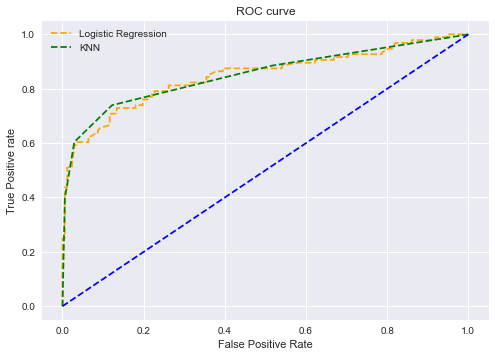

In [76]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=127)

In [109]:
model4=GaussianNB()
model3=DecisionTreeClassifier()

In [110]:
#fit the model
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [111]:
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [112]:
#predict the probabilities
pred_prob3=model3.predict_proba(x_test)
pred_prob4=model4.predict_proba(x_test)

In [113]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

In [114]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [115]:
from sklearn.metrics import roc_auc_score

In [118]:
# auc scores
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score3, auc_score4)

0.8014474321705427 0.8414486434108527


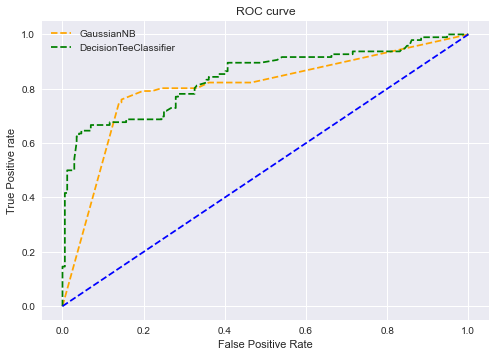

In [126]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GaussianNB')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DecisionTeeClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [124]:
model5=RandomForestClassifier()
model6=BaggingClassifier()

In [125]:
model5.fit(x_train,y_train)

C:\Users\RISHI\AppData\Local\Temp/ipykernel_11828/4200687828.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model5.fit(x_train,y_train)


RandomForestClassifier()

In [127]:
model6.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier()

In [128]:

#predict the probabilities
pred_prob5=model5.predict_proba(x_test)
pred_prob6=model6.predict_proba(x_test)

In [129]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)


In [130]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [131]:
# auc scores
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])

print(auc_score5, auc_score6)

0.8389656007751938 0.8565588662790697


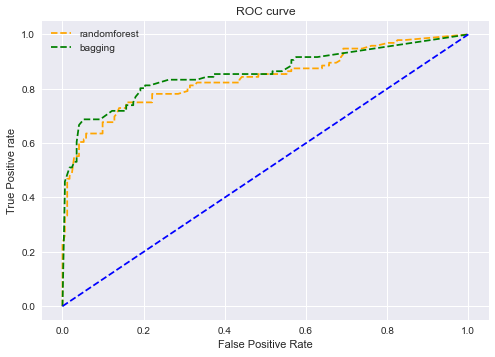

In [132]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='randomforest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='bagging')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();